In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [41]:
data = pd.read_csv("neo.csv")

In [42]:
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [43]:
data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [45]:
data.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [46]:
for i in ["orbiting_body","sentry_object","hazardous"]:
    print(i)
    print(data[i].value_counts())

orbiting_body
Earth    90836
Name: orbiting_body, dtype: int64
sentry_object
False    90836
Name: sentry_object, dtype: int64
hazardous
False    81996
True      8840
Name: hazardous, dtype: int64


In [47]:
data.drop(columns=["id","name","orbiting_body","sentry_object"], inplace=True)

In [48]:
data.select_dtypes(include="number").columns

Index(['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude'],
      dtype='object')

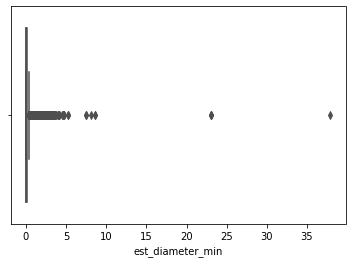

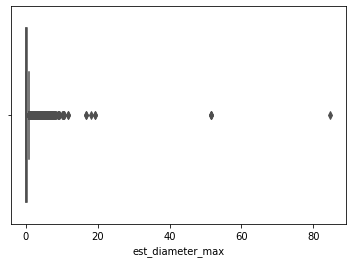

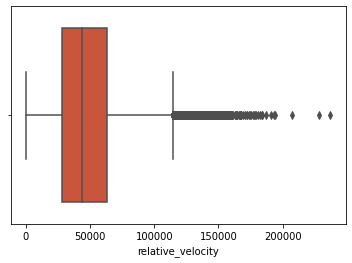

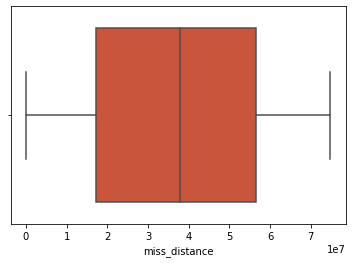

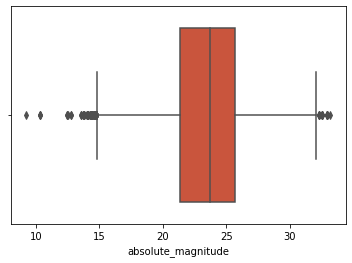

In [49]:
for i in ['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude']:
       plt.subplots()
       sns.boxplot(x=i, data=data, color="#E14625")
       plt.show()

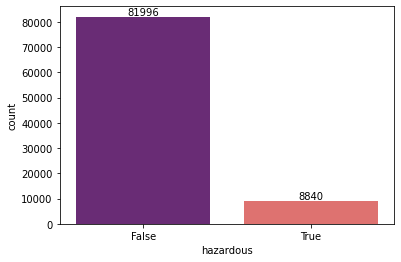

In [50]:
haz = sns.countplot(x="hazardous", data=data, palette="magma")
haz.bar_label(haz.containers[0])
plt.show()

In [51]:
X = data.drop(columns="hazardous")
Y = data["hazardous"]

In [52]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y)

In [53]:
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape) 
print(yTest.shape)

(68127, 5)
(22709, 5)
(68127,)
(22709,)


In [54]:
# Importing metrics
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score

In [55]:
results = pd.DataFrame(columns=["Model","TrainScore","TestScore","PrecisionTrue"])

In [56]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
# Defining a function for metrics.
# Logistic Regression
# GaussianNB
# DecisionTreeClassifier
# RandomForestClassifier
# KNN
# SVC
def classificationmodel(test):
    test.fit(xTrain, yTrain)
    scoretrain = test.score(xTrain, yTrain)
    scoretest = test.score(xTest, yTest)
    print("Score of the training dataset:", test.score(xTrain, yTrain))
    print("Score of the testing dataset:", test.score(xTest, yTest), "\n")
    print("Precision score for True:", precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True))
    print(classification_report(yTest, test.predict(xTest)))
    plot_confusion_matrix(test, xTest, yTest)
    if len(results.index) == 0:
        results.loc[len(results.index)] = ["LR", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 1:
        results.loc[len(results.index)] = ["GNB", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 2:
        results.loc[len(results.index)] = ["DTC", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 3:
        results.loc[len(results.index)] = ["RFC", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 4:
        results.loc[len(results.index)] = ["KNN", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 5:
        results.loc[len(results.index)] = ["GBC", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]

Score of the training dataset: 0.9028138623453257
Score of the testing dataset: 0.9022854374917434 

Precision score for True: 0.0
              precision    recall  f1-score   support

       False       0.90      1.00      0.95     20490
        True       0.00      0.00      0.00      2219

    accuracy                           0.90     22709
   macro avg       0.45      0.50      0.47     22709
weighted avg       0.81      0.90      0.86     22709



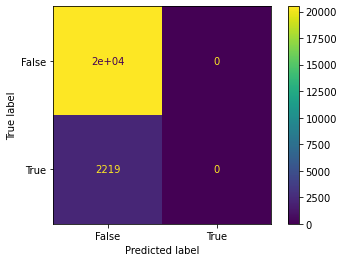

In [58]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
classificationmodel(LR)

In [59]:
results

,Model,TrainScore,TestScore,PrecisionTrue
0,LR,0.902814,0.902285,0.0


# Over sampling data using RandomOverSampler

In [60]:
results = pd.DataFrame(columns=["Model","TrainScore","TestScore","PrecisionTrue"])

In [61]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="minority")

xTrain, yTrain = ros.fit_resample(xTrain, yTrain)

In [62]:
yTrain.value_counts()

False    61506
True     61506
Name: hazardous, dtype: int64

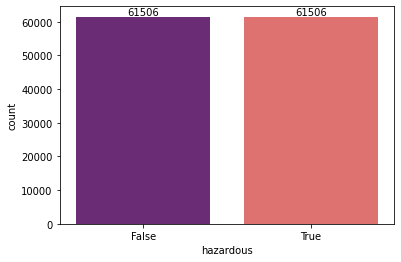

In [63]:
haz = sns.countplot(x=yTrain, palette="magma")
haz.bar_label(haz.containers[0])
plt.show()

Score of the training dataset: 0.5652537963775892
Score of the testing dataset: 0.4130080584790171 

Precision score for True: 0.12029252956052218
              precision    recall  f1-score   support

       False       0.94      0.37      0.53     20490
        True       0.12      0.79      0.21      2219

    accuracy                           0.41     22709
   macro avg       0.53      0.58      0.37     22709
weighted avg       0.86      0.41      0.50     22709



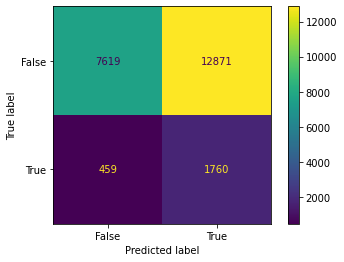

In [64]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
classificationmodel(LR)

Score of the training dataset: 0.604949110655871
Score of the testing dataset: 0.6818442027390021 

Precision score for True: 0.16321313240043056
              precision    recall  f1-score   support

       False       0.93      0.70      0.80     20490
        True       0.16      0.55      0.25      2219

    accuracy                           0.68     22709
   macro avg       0.55      0.62      0.52     22709
weighted avg       0.86      0.68      0.74     22709



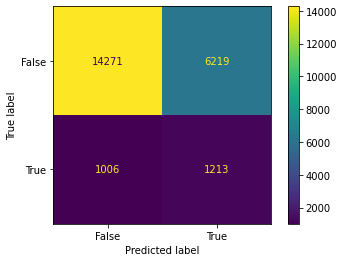

In [65]:
from sklearn.naive_bayes import GaussianNB
GSS = GaussianNB()
classificationmodel(GSS)

Score of the training dataset: 1.0
Score of the testing dataset: 0.8914967633977718 

Precision score for True: 0.4431026474686484
              precision    recall  f1-score   support

       False       0.94      0.94      0.94     20490
        True       0.44      0.43      0.44      2219

    accuracy                           0.89     22709
   macro avg       0.69      0.69      0.69     22709
weighted avg       0.89      0.89      0.89     22709



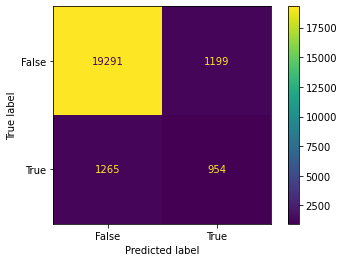

In [66]:
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier()
classificationmodel(DTR)

Score of the training dataset: 1.0
Score of the testing dataset: 0.9067330133427276 

Precision score for True: 0.5222958057395144
              precision    recall  f1-score   support

       False       0.95      0.95      0.95     20490
        True       0.52      0.53      0.53      2219

    accuracy                           0.91     22709
   macro avg       0.74      0.74      0.74     22709
weighted avg       0.91      0.91      0.91     22709



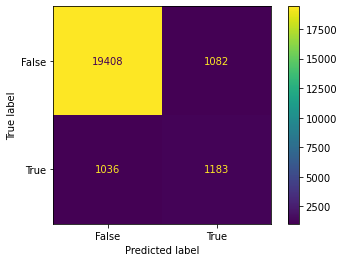

In [67]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
classificationmodel(RFC)

Score of the training dataset: 0.9163089779858875
Score of the testing dataset: 0.7268043506979611 

Precision score for True: 0.14502048815250312
              precision    recall  f1-score   support

       False       0.92      0.77      0.83     20490
        True       0.15      0.37      0.21      2219

    accuracy                           0.73     22709
   macro avg       0.53      0.57      0.52     22709
weighted avg       0.84      0.73      0.77     22709



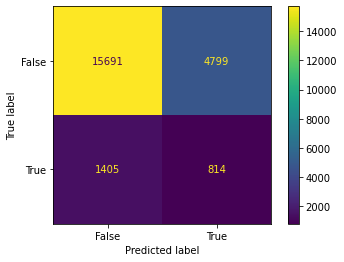

In [68]:
from sklearn.neighbors import KNeighborsClassifier
KNNC = KNeighborsClassifier()
classificationmodel(KNNC)

Score of the training dataset: 0.8800198354632068
Score of the testing dataset: 0.7836980932669867 

Precision score for True: 0.30952044136370066
              precision    recall  f1-score   support

       False       1.00      0.76      0.86     20490
        True       0.31      0.99      0.47      2219

    accuracy                           0.78     22709
   macro avg       0.65      0.87      0.67     22709
weighted avg       0.93      0.78      0.83     22709



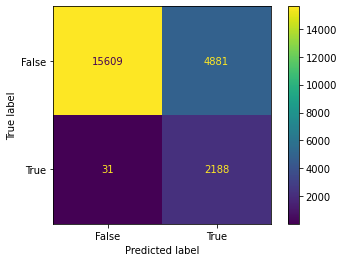

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
classificationmodel(GBC)

In [70]:
results

,Model,TrainScore,TestScore,PrecisionTrue
0,LR,0.565254,0.413008,0.120293
1,GNB,0.604949,0.681844,0.163213
2,DTC,1.000000,0.891497,0.443103
3,RFC,1.000000,0.906733,0.522296
4,KNN,0.916309,0.726804,0.145020
5,GBC,0.880020,0.783698,0.309520


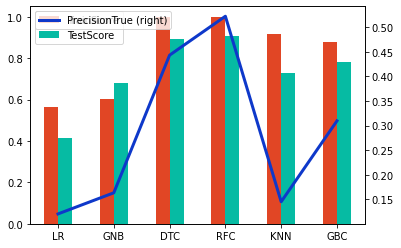

In [71]:
results[["TrainScore","TestScore"]].plot(kind="bar", color=["#E14625","#06BBA3"])
plt.xticks(range(0,len(results["Model"])), results["Model"])
results["PrecisionTrue"].plot(c="#0E38CA", linewidth=3, secondary_y=True, label="PrecisionTrue")
plt.legend()
plt.show()

In [72]:
# Changing max_depth to avoid overfitting.
DTC2 = DecisionTreeClassifier(max_depth=32)
DTC2.fit(xTrain, yTrain)
print("Score of training dataset:",DTC2.score(xTrain, yTrain))
print("Score of testing dataset:",DTC2.score(xTest, yTest))
print(classification_report(yTest, DTC2.predict(xTest)))
results.loc[len(results.index)] = ["DTC2", DTC2.score(xTrain, yTrain), DTC2.score(xTest, yTest), precision_score(y_true=yTest, y_pred=DTC2.predict(xTest), pos_label=True)]

Score of training dataset: 0.9683526810392482
Score of testing dataset: 0.8610682989123255
              precision    recall  f1-score   support

       False       0.95      0.89      0.92     20490
        True       0.37      0.59      0.45      2219

    accuracy                           0.86     22709
   macro avg       0.66      0.74      0.69     22709
weighted avg       0.90      0.86      0.87     22709



In [73]:
# Changing max_depth to avoid overfitting.
RFC2 = RandomForestClassifier(max_depth=32)
RFC2.fit(xTrain, yTrain)
print("Score of training dataset:",RFC2.score(xTrain, yTrain))
print("Score of testing dataset:",RFC2.score(xTest, yTest))
print(classification_report(yTest, RFC2.predict(xTest)))
results.loc[len(results.index)] = ["RFC2", RFC2.score(xTrain, yTrain), RFC2.score(xTest, yTest), precision_score(y_true=yTest, y_pred=RFC2.predict(xTest), pos_label=True)]

Score of training dataset: 0.9944151790069261
Score of testing dataset: 0.8940508168567528
              precision    recall  f1-score   support

       False       0.96      0.92      0.94     20490
        True       0.47      0.61      0.53      2219

    accuracy                           0.89     22709
   macro avg       0.71      0.77      0.74     22709
weighted avg       0.91      0.89      0.90     22709



In [74]:
# RandomForrestClassifier with max_depth=32 had the best results.
results

,Model,TrainScore,TestScore,PrecisionTrue
0,LR,0.565254,0.413008,0.120293
1,GNB,0.604949,0.681844,0.163213
2,DTC,1.000000,0.891497,0.443103
3,RFC,1.000000,0.906733,0.522296
4,KNN,0.916309,0.726804,0.145020
5,GBC,0.880020,0.783698,0.309520
6,DTC2,0.968353,0.861068,0.367722
7,RFC2,0.994415,0.894051,0.467770
